In [1]:
!git clone https://github.com/Lornatang/WassersteinGAN-PyTorch.git
%cd WassersteinGAN-PyTorch/
!pip3 install -r requirements.txt


fatal: destination path 'WassersteinGAN-PyTorch' already exists and is not an empty directory.
/content/WassersteinGAN-PyTorch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)


Current working directory: /content/WassersteinGAN-PyTorch


In [3]:
from wgan_pytorch.models import lsun
model = lsun(pretrained=True)
print(model)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (13): Tanh()
  )
)


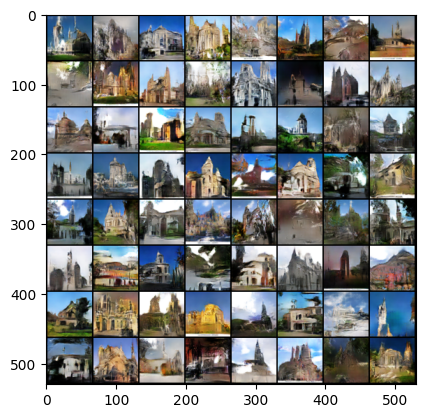

In [4]:
# Using Torch Hub library.
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt


# Choose to use the device.
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Load the model into the specified device.
model = torch.hub.load("Lornatang/WassersteinGAN-PyTorch", "lsun", pretrained=True, progress=True, verbose=False)
model.eval()
model = model.to(device)

# Create random noise image.
num_images = 64
noise = torch.randn(num_images, 100, 1, 1, device=device)

# The noise is input into the generator model to generate the image.
with torch.no_grad():
    generated_images = model(noise)

# Save generate image.
vutils.save_image(generated_images, "lsun.png", normalize=True)
output = plt.imread('lsun.png')
plt.imshow(output)

In [ ]:
!python3 train.py data \
                   -a lsun \
                   --dataset lsun \
                   --image-size 64 \
                   --classes church_outdoor \
                   --start-iter 10000 \
                   --netG weights/lsun_G_iter_10000.pth \
                   --netD weights/lsun_D_iter_10000.pth